<a href="https://colab.research.google.com/github/ththtec/data_driven_insights.ipynb/blob/main/data_driven_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📘 Instrução – Mini Projeto: Data-Driven Insights (Módulo 01)
🧑‍💻 Projeto
Projeto prático de exploração e visualização de dados com Python no Google Colab, utilizando a base Sample Sales Datano, formato .csv.

https://www.kaggle.com/datasets/kyanyoga/sample-sales-data

#🎯 Objetivo
Explorar, transformar e visualizar dados com base em estruturas do Python e bibliotecas como pandas, numpy e matplotlib, gerando insights descritivos a partir da análise.

#1. 📂Importando as bibliotecas

In [1]:
%pip install pandas
%pip install matplotlib

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#2. 📝 Leitura e Exploração Inicial da Base

---



In [10]:
from google.colab import files
uploaded = files.upload()

Saving sales_data_sample.csv to sales_data_sample (2).csv


In [14]:
df = pd.read_csv('sales_data_sample (2).csv', encoding='latin-1')

In [131]:
#Exibe as 5 primeiras linhas do df

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...           CITY  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...            NYC   
1    5/7/2003 0:00  Shipped       2         5     2003  ...          Reims   
2    7/1/2003 0:00  Shipped       3         7     2003  ...          Paris   
3   8/25/2003 0:00  Shipped       3         8     2003  ...       Pasadena   
4  10/10/2003 0:00  Shipped       4        10     2003  ...  San Francisco   

   STATE POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME  \
0     NY      10022     

In [132]:
#Exibe o número de linhas e colunas do df
print(df.shape)

(2823, 27)


In [133]:
## Exibe os nomes de todas as colunas do df
print(df.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'Multiplicacao', 'Diferenca'],
      dtype='object')


In [135]:
#Retorna os tipos de dados do df
#o df não possui dados do tipo bool(booleano)
print(df.dtypes)


ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
Multiplicacao       float64
Diferenca           float64
dtype: object


In [136]:
#Conta quantas vezes cada tipo de dado aparece no df
print(df.dtypes.value_counts())

object     16
int64       7
float64     4
Name: count, dtype: int64



| Tipo de dado | Quantidade de colunas |                 
|--------------|------------------------|
| 🔤 `object`  | 16                     |
| 🔢 `int64`   | 7                      |
| 🔬 `float64` | 4                      |

> Total de colunas: **27** (df.shape)


#Insights

A base utilizada possui um total de 2.823 registros e 27 colunas. Em df.head(), possuimos dados de pedidos, valores de vendas, datas, códigos postais, status de envio de produtos e muito mais. Dos tipos de dados temos que 16 atributos  object, 7 int64, 4 float64, configurando que os campos são categorias, datas e números.

#3. 📚Listas, Dicionários e Tuplas

In [20]:
# Lista: Países para onde foram realizadas vendas
nomes = list(df['COUNTRY'])
for nome in nomes[:5]:
    print(nome)

USA
France
France
USA
USA


In [26]:
# Dicionário: Primeiro nome e País dos Clientes
dicionario = dict(zip(df['CONTACTFIRSTNAME'][:3], df['COUNTRY'][:3]))
print(dicionario)

{'Kwai': 'USA', 'Paul': 'France', 'Daniel': 'France', 'Julie': 'USA'}


In [27]:
# Tupla: retorna o PAÍS/ESTADO/CODIGO POSTAL
linha0 = df.iloc[0]
minha_tupla = (linha0['COUNTRY'], linha0['STATE'], linha0['POSTALCODE'])
print(minha_tupla)

('USA', 'NY', '10022')


#Insights

Na observação, em lista, dos 5 primeiros registros percebe-se a forte presença dos EUA na clientela. No dicionário, verificamos a relação cliente x País, e em Tupla, observamos a relação PAÍS/ESTADO/CODIGO POSTAL.

#4.  🧠 Estruturas Condicionais e Laços

In [140]:
# Analise da quantidade de pedidos
coluna_numerica = 'QUANTITYORDERED'
primeiro_valor = df[coluna_numerica][0]


In [141]:
#Base para comparações:
media = df['QUANTITYORDERED'].mean()
print("Média da QUANTITYORDERED:", media)


Média da QUANTITYORDERED: 35.09280906836698


In [142]:
#Condicional baseada na média da Quantidade de Pedidos para determinar a classificação com base no volume
if primeiro_valor > 35:
    print("Valor alto")
elif primeiro_valor > 5:
    print("Valor intermediário")
else:
    print("Valor baixo")

Valor intermediário


In [143]:
# For para operar sobre n primeiros elementos de uma coluna numérica escolhida
# Soma das 5 primeiras quantidades de pedidos
soma = 0
lista = list(df['QUANTITYORDERED'][:5])
for n in lista:
    soma += n
print("Soma dos 5 primeiros valores:", soma)

Soma dos 5 primeiros valores: 199


In [47]:
## While: Encontrar o primeiro valor maior que um certo limite, estipulado como a média total da tabela
# Faz a análise de verificação condicional da  Quantidade de Pedidos com base na média
limite = 35  # Ajuste conforme o contexto da coluna escolhida
i = 0
while i < len(lista) and lista[i] <= limite:
    i += 1
if i < len(lista):
    print("Primeiro valor >", limite, "encontrado:", lista[i])
else:
    print("Nenhum valor maior que", limite, "encontrado nos primeiros 5.")

Primeiro valor > 35 encontrado: 41


#Insights

 O calculo da média é utilizado como referência para condicionar os valores das vendas como alto, intermediário e baixo. A soma das transações totalizam 199 unidades, sugerindo que, a o conjunto acumula uma quantidade significativa, tendo somente os 2 dos 5 primeiros itens abaixo da média de pedidos.

#5. 🧮 Operadores Aritméticos e Manipulação de Dados

In [53]:
#Calcula o valor bruto por pedido
#Pode visualizar descontos, impostos, ou erros de registro

if 'QUANTITYORDERED' in df.columns and 'PRICEEACH' in df.columns:
    df['Multiplicacao'] = df['QUANTITYORDERED'] * df['PRICEEACH']
    print(df[['QUANTITYORDERED', 'PRICEEACH', 'Multiplicacao']].head())



   QUANTITYORDERED  PRICEEACH  Multiplicacao
0               30      95.70        2871.00
1               34      81.35        2765.90
2               41      94.74        3884.34
3               45      83.26        3746.70
4               49     100.00        4900.00


In [68]:
#Visualiza a diferença entre o valor original de venda e os valores da coluna SALES
df['Diferenca'] = (df['SALES'] - df['Multiplicacao']).round(2)
print(df[['SALES', 'Multiplicacao', 'Diferenca']].head())


     SALES  Multiplicacao  Diferenca
0  2871.00        2871.00       0.00
1  2765.90        2765.90       0.00
2  3884.34        3884.34       0.00
3  3746.70        3746.70      -0.00
4  5205.27        4900.00     305.27


#Insights

Visualização de possível discrepância de valores, mas no item 4, ordem 10159, pode indicar descontos aplicados não referidos, outros valores como frete, impostos ou outros adendos como alguma  de dados e regristo. inconsistência.

#6.🔢 NumPy e Arrays Numéricos

In [72]:
# Para fins de análise em Numpy, transforma todos os valores da coluna SALES em um array NumPy
array = np.array(df['SALES'])


In [147]:
# Operações NumPy
#Adiciona 10 unidades a cada elemento do array
# De interesse para simular reajustes, fretes, acréscimos, impostos ou descontos
array_somado = array + 10

#Eleva ao quadrado cada valor de venda
#De interesse estátistico
array_quadrado = array ** 2

In [145]:
#Exibe os 5 primeiros valores originais de SALES
print(array[:5])

[2871.   2765.9  3884.34 3746.7  5205.27]


In [82]:
#Exibe os 5 primeiros valores de SALES adicionando +10 unidades a cada elemento
print(array_somado[:5])

[2881.   2775.9  3894.34 3756.7  5215.27]


In [76]:
#Exibe os 5 primeiros valores de SALES que contém o quadrado de cada valor
print(array_quadrado[:5])

[ 8242641.      7650202.81   15088097.2356 14037760.89   27094835.7729]


In [79]:
#Representam o faturamento total e valor médio por pedido
print("Soma dos elementos:", array.sum())

In [81]:
#A média indica que cada transação gera cerca de R$ 3.553,89
print("Média dos elementos:", array.mean())

Média dos elementos: 3553.889071909316


#Insights
A análise com Python e NumPy revela que o valor médio de cada venda é de R$ 3.553,89.E cálculos em massa, como simular acréscimos (adicionando 10 unidades a cada venda) e realizar análises estatísticas (elevando os valores ao quadrado) de forma rápida e direta.

#7. 📈 Acesso e Manipulação de Dados com Pandas

In [89]:
# Usando .loc: Selecionar colunas específicas e linhas com QUANTITYORDERED > 35
#Filtra linhas onde a coluna 'QUANTITYORDERED' é maior que 35
df_filtrado = df.loc[df['QUANTITYORDERED'] > 35, ['ORDERNUMBER', 'QUANTITYORDERED', 'SALES']]
print(df_filtrado.head())



   ORDERNUMBER  QUANTITYORDERED    SALES
2        10134               41  3884.34
3        10145               45  3746.70
4        10159               49  5205.27
5        10168               36  3479.76
7        10188               48  5512.32


In [93]:
# Usando .iloc: Pegar as 5 primeiras linhas e colunas 0 a 2
# Verifica a quantidade total de itens pedidos por cada país


df_iloc = df.iloc[:5, :3]
print(df_iloc)


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH
0        10107               30      95.70
1        10121               34      81.35
2        10134               41      94.74
3        10145               45      83.26
4        10159               49     100.00


In [148]:
#Calcula a quantidade total de itens pedidos por país e exibe os 5 países com o maior volume
df_categoria = df.groupby('COUNTRY')['QUANTITYORDERED'].sum().sort_values(ascending=False).head(5)
print(df_categoria)



COUNTRY
USA          35659
Spain        12429
France       11090
Australia     6246
UK            5013
Name: QUANTITYORDERED, dtype: int64


| País         | Quantidade de Pedidos |
|--------------|---------------|
| USA          | 35.659        |
| Spain        | 12.429        |
| France       | 11.090        |
| Australia    | 6.246         |
| UK           | 5.013         |

#Insights
Visualizamos os pedidos com quantidade superior a 35 unidades, valores de vendas elevados, e alto faturamento. Os cinco primeiros registros completos revelam uma progressão entre quantidade de pedidos e preço unitário. Vemos os EUA com maior presença em quantidade de pedidos.

#8. 📊 Visualização de Dados

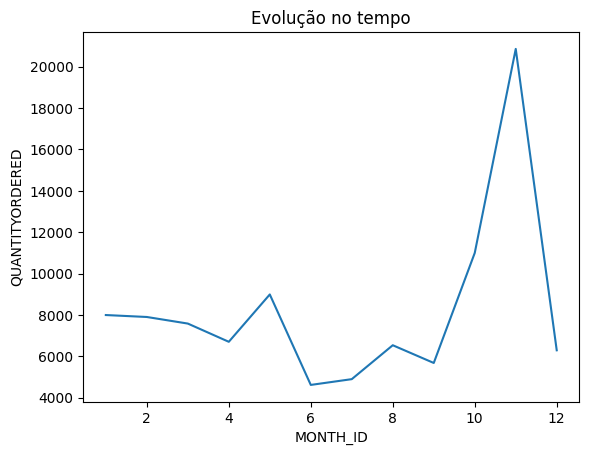

In [127]:
#Agrupa os dados pelo MONTH_ID e, para cada mês, calcula a soma da QUANTITYORDERED.
#Percebe-se um pico de Pedidos entre os meses 9 e 11, seguido de queda no mês 12
#Os meses 6 e 7 apresentam os volumes de Pedidos mais baixo

if 'MONTH_ID' in df.columns and 'QUANTITYORDERED' in df.columns:
    df.groupby('MONTH_ID')['QUANTITYORDERED'].sum().sort_index().plot(kind='line')
    plt.title('Evolução no tempo')
    plt.xlabel('MONTH_ID')
    plt.ylabel('QUANTITYORDERED')
    plt.show()

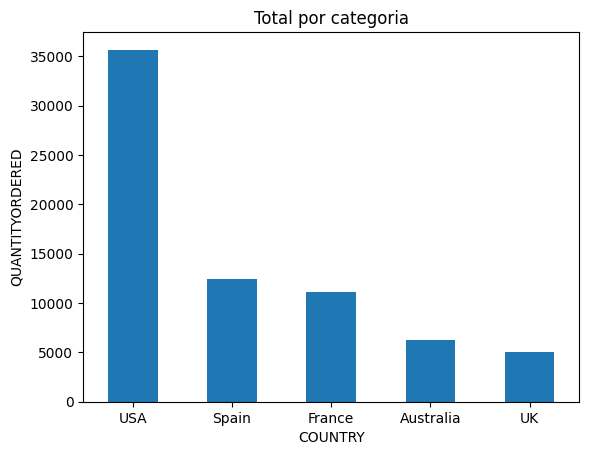

In [111]:
#Agrupa os dados pela coluna COUNTRY e calcula a soma da QUANTITYORDERED
#USA, seguido de Spain e France em são top 3 em quantidade total de pedidos, com maior volume
#Australia e UK apresentam volumes menores em comparação

if 'COUNTRY' in df.columns and 'QUANTITYORDERED' in df.columns:



    df.groupby('COUNTRY')['QUANTITYORDERED'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
    plt.title('Total por categoria')
    plt.xlabel('COUNTRY')
    plt.ylabel('QUANTITYORDERED')
    plt.xticks(rotation=0)
    plt.show()

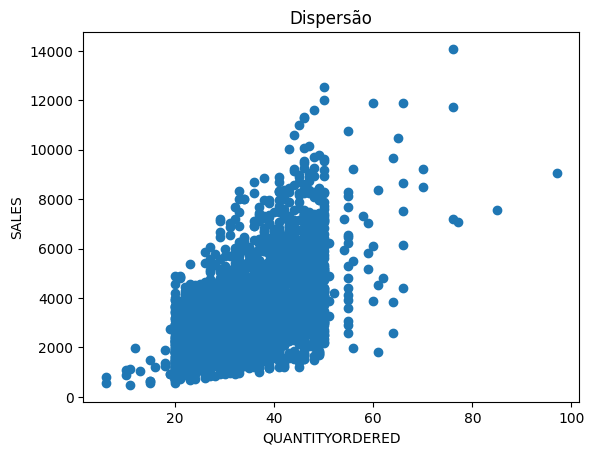

In [128]:
#Visualiza a relação ou correlação entre duas variáveis QUANTITYORDERED (eixo X) e SALES (eixo Y)
#Mostra que vendas não crescem de forma linear, o que pode ser explicado pelos preços dos itens
#Vemos um padrão de vendas bem expressivo

if 'QUANTITYORDERED' in df.columns and 'SALES' in df.columns:
    plt.scatter(df['QUANTITYORDERED'], df['SALES'])
    plt.title('Dispersão')
    plt.xlabel('QUANTITYORDERED')
    plt.ylabel('SALES')
    plt.show()

#9. 📌 Relatório e Insights

A base utilizada possui um total de 2.823 registros e 27 colunas. Em df.head(), possuímos dados de pedidos, valores de vendas, datas, códigos postais, status de envio de produtos e muito mais. Dos tipos de dados, temos 16 atributos object, 7 int64, 4 float64, configurando que os campos são categorias, datas e números.




Na observação, em lista, dos 5 primeiros registros, percebe-se a forte presença dos EUA na clientela. No dicionário, verificamos a relação cliente x País, e em Tupla, observamos a relação PAÍS/ESTADO/CÓDIGO POSTAL.




 O cálculo da média é utilizado como referência para condicionar os valores das vendas como alto, intermediário e baixo. A soma das transações totaliza 199 unidades, sugerindo que o conjunto acumula uma quantidade significativa, tendo somente 2 dos 5 primeiros itens abaixo da média de pedidos.




Visualização de possível discrepância de valores, mas no item 4, ordem 10159, pode indicar descontos aplicados não referidos, outros valores como: frete, impostos e outros adendos como inconsistência ou erros de dados e registro.




A análise com Python e NumPy revela que o valor médio de cada venda é de R$ 3.553,89. E cálculos em massa, como simular acréscimos (adicionando 10 unidades a cada venda) e realizar análises estatísticas (elevando os valores ao quadrado) de forma rápida e direta.




Visualizamos os pedidos com quantidade superior a 35 unidades, valores de vendas elevados e alto faturamento. Os cinco primeiros registros completos revelam uma progressão entre quantidade de pedidos e preço unitário. Vemos os EUA com maior presença em quantidade de pedidos.

Algums funções foram adicionadas para melhor visualizar dados:

>print(df.dtypes.value_counts())

>.sort_values(ascending=False).head(5)

>plt.xticks(rotation=0)

>df_categoria = df.groupby('COUNTRY')['QUANTITYORDERED'].sum().sort_values

>(ascending=False).head(5)


>print(df_categoria)
